 # **XAISuite General Demo**

 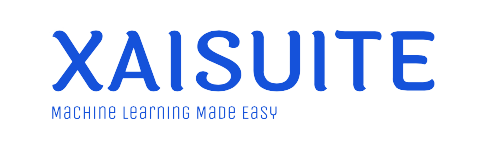





Welcome to the XAISuite General Demo. Here you'll find countless examples about how to use XAISuite for easier machine learning model training, explanation, and explanation comparison.

First, start by installing the XAISuite library.

In [ ]:
!pip install XAISuite==2.8.3

Then, import the library. You may need to restart runtime for this to work correctly.

In [ ]:
from xaisuite import*

Run the following code to see a mini doc of XAISuite classes and functions.

In [ ]:
help(DataLoader)
help(DataProcessor)
help(ModelTrainer)
help(InsightGenerator)

Let's first start with Data Loading. The `xaisuite.dataHandler.DataLoader `class allows loading of data from different sources.

In [ ]:
DataLoader(make_classification)

In [ ]:
DataLoader(load_diabetes, return_X_y = True)

In [ ]:
import numpy as np
data = np.zeros(20)
DataLoader(data)

In [ ]:
import pandas as pd
data = pd.DataFrame([[1, 2, 3], [3, 4, 5]])
DataLoader(data)

In [ ]:
DataLoader('path/to/local/file')

DataLoader also has options to specify the variable names, target name, categorical variables, etc. If not specified, these values are inferred.

Visualize variables loaded by `DataLoader`

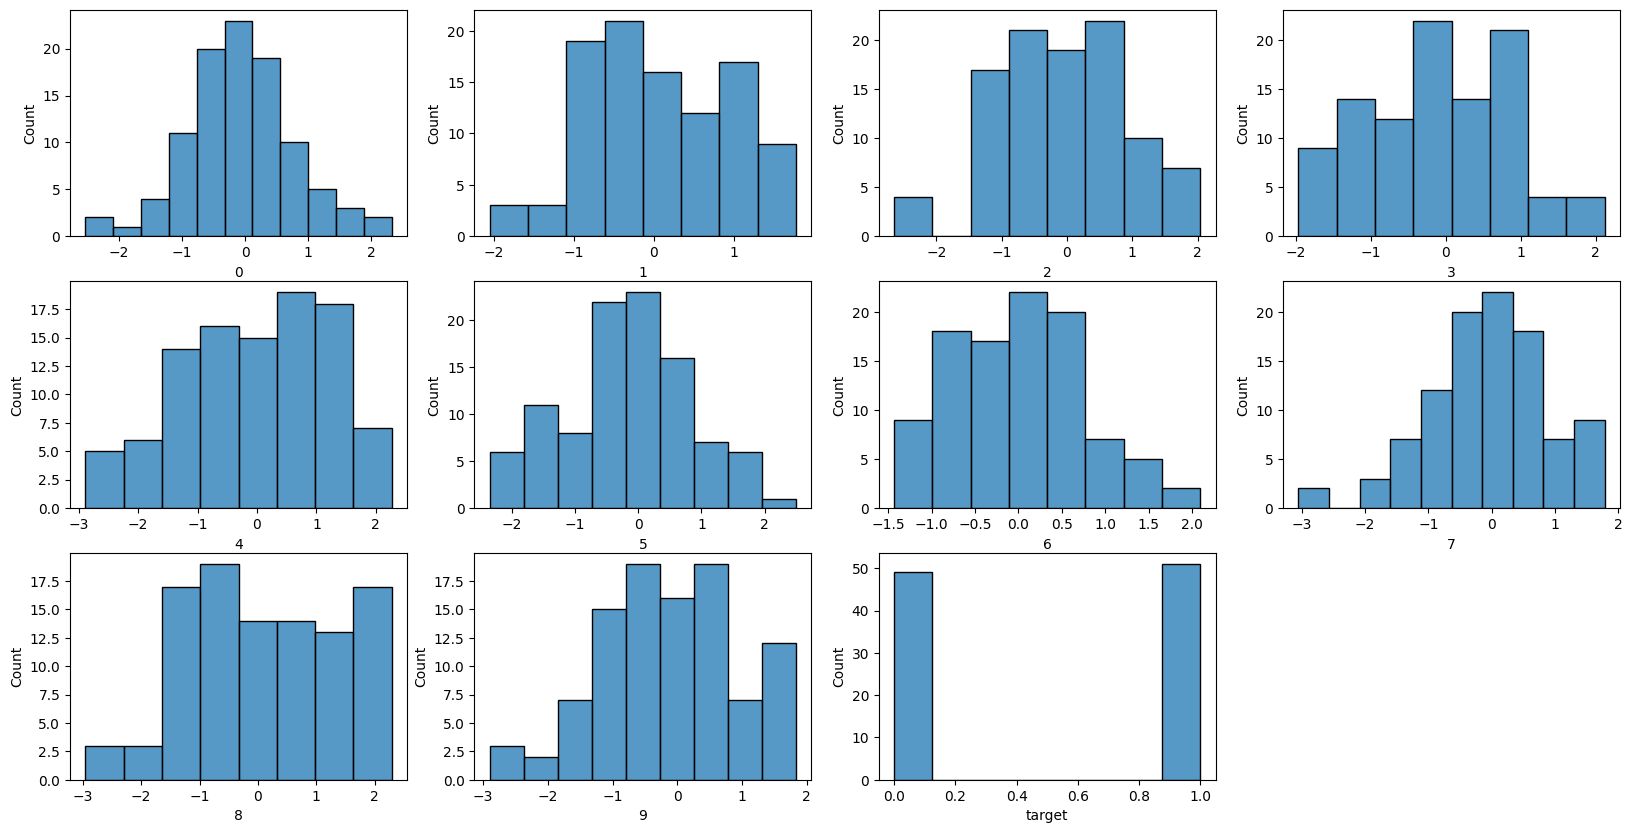

In [ ]:
load_data = DataLoader(make_classification, n_features = 10)
load_data.plot()

For optimal model training, additional processing must be done to the data. This is where `xaisuite.dataHandler.DataProcessor` comes into play. You can process data with default parameters or pass in your own transforms (like from the `sklearn.preprocessing` library).

In [ ]:
load_data = DataLoader(make_classification, n_features = 10)
DataProcessor(load_data)

In [ ]:
load_data = DataLoader(load_diabetes, return_X_y = True)
DataProcessor(load_data, test_size = 0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler
load_data = DataLoader(load_diabetes, return_X_y = True)
DataProcessor(load_data, test_size = 0.1, target_transform = "component: StandardScaler()")

To train a model, simply do:

In [ ]:
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)

ModelTrainer("SVR", process_data)

You can also pass in a model directly without using a String representation.

In [ ]:
from sklearn.svm import SVR
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)

ModelTrainer(SVR, process_data, epsilon = 0.2)

For explaining, simply list the desired explanations.

In [ ]:
from sklearn.svm import SVR
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)

ModelTrainer(SVR, process_data, explainers = ["lime", "shap"], epsilon = 0.2)

You can pass in arguments to the explainers:

In [ ]:
from sklearn.svm import SVR
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)

ModelTrainer(SVR, process_data, explainers = {"lime": {"feature_selection": "none"}, "shap": {}}, epsilon = 0.2)

To access the explanations, use the `getExplanationsFor`, `getAllExplanations`, or `getSummaryExplanations` functions. Use `plotExplanations` for explanation visualization.

In [ ]:
from sklearn.svm import SVR
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)
train_model = ModelTrainer(SVR, process_data, explainers = {"lime": {"feature_selection": "none"}, "shap": {}}, epsilon = 0.2)

explanations = train_model.getExplanationsFor([]) # Gets all explanations. You can also request explanations for a specific instance
train_model.plotExplanations("lime", 1) #Display the lime explainer results for the 2nd instance returned by getExplanationsFor()

Model score is 0.22886080630718109
Generating explanations.


  0%|          | 0/45 [00:00<?, ?it/s]

Calculate similarity between explainers using the Shreyan Distance

In [ ]:
from sklearn.svm import SVR
load_data = DataLoader(load_diabetes, return_X_y = True)
process_data = DataProcessor(load_data, test_size = 0.1)
train_model = ModelTrainer(SVR, process_data, explainers = {"lime": {"feature_selection": "none"}, "shap": {}}, epsilon = 0.2)
explanations = train_model.getExplanationsFor([])

insights = InsightGenerator(explanations)
print(insights.calculateExplainerSimilarity("lime", "shap"))

Model score is 0.14626289816154203
Generating explanations.


  0%|          | 0/45 [00:00<?, ?it/s]

0.8081355932203389


*NOTE*: For examples using tensorflow or pytorch models, check out our other demos.